In [2]:
import sys
import os

sys.path.append('../../../')

from bci_framework.utils import Paradigm
from matplotlib import pyplot as plt

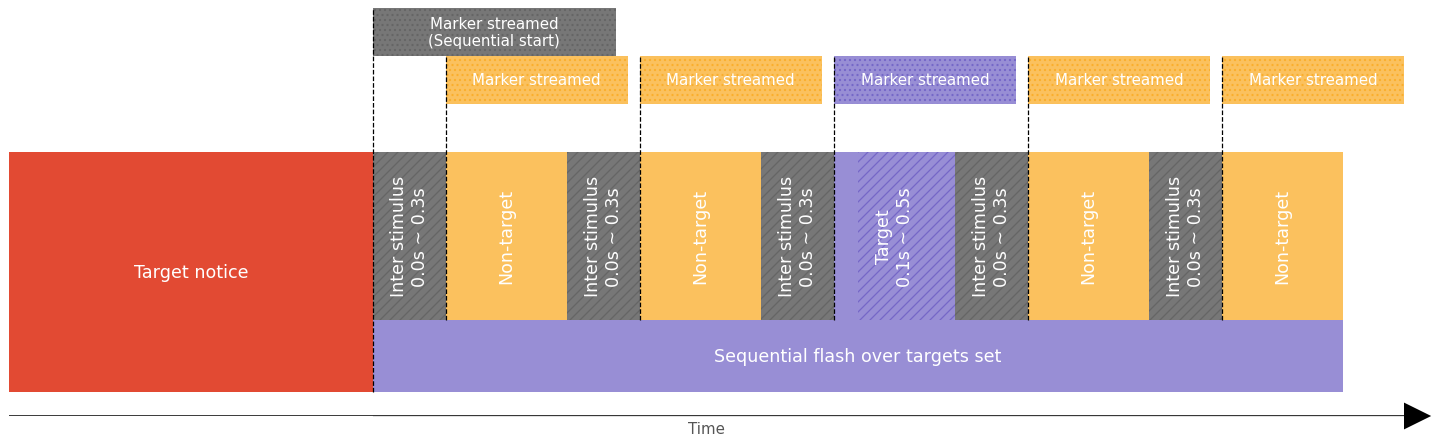

In [3]:
fig = plt.figure(figsize=(20, 6), dpi=90)

paradigm = [
    {
        'time': (-1.5, 0),  
#         'level': (0.5, 1), 
        'label': 'Target notice',
        'color': 'C0',
    },
#     {
#         'time': (0, -1.5, -2.5),
#         'level': (0, 0.5), 
#         'label': 'Break',
#         'color': 'C3',
#     },   
    {
        'time': (0, 4),
        'level': (0, 0.3), 
        'label': 'Sequential flash over targets set',
        'color': 'C2',
    },       
]

N = 5
paradigm_flash = []
for i in range(N):
    
    T = (i-1)*0.8 + 1.1
    stimulus = [
        {
        'time': (-0.3+T, -0.3+T, 0+T),
        'level': (0.3, 1),   
        'label': 'Inter stimulus',
        'color': 'C3',
        'rotation': 90,
#         'alpha': 0.2,
        },
        {
        'time': (0+T, 0.5+T),
        'level': (0.3, 1),   
        'label': 'Non-target',
        'color': 'C4',
        'rotation': 90,
#         'alpha': 0.2,        
            
        'marker': {
            'label': 'Marker streamed',
            'width': 0.75,
            'level': 1,
            'min': 0.4,
        }
        },
    
    ]
    
    if i == N//2:
        stimulus[0]['time'] = (-0.3+T, -0.3+T, 0+T)
        stimulus[0]['color'] = 'C3'
        
        stimulus[1]['time'] = (0+T, 0.1+T, 0.5+T)
        stimulus[1]['label'] = 'Target'
        stimulus[1]['color'] = 'C2'

    if i == 0:
        stimulus[0]['marker']={
            'label': 'Marker streamed\n(Sequential start)',
            'width': 1,
            'level': 2,
        }
        
    paradigm_flash.extend(stimulus)

Paradigm.build_paradigm(paradigm + paradigm_flash)
plt.savefig('paradigm.png', bbox_inches='tight')

# P300 Speller

Implemented through extensions systems in the [P300Speller](../../../../_modules/bci_framework.default_extensions.P300_Speller.main.rst) module.

<img src='paradigm.png'></img>

The interface layout of the speller followed the typical design of a row-column speller. The six rows and six columns were configured with 36 symbols (A to Z, 0 to 9). Each symbol was presented equally spaced. The stimulus-time interval can be setted between 100 and 500 ms, and the inter-stimulus interval (ISI) between 0 and 300 ms. A single iteration of stimulus presentation in all rows and columns was considered a sequence. Therefore, one sequence consisted of 12 stimulus flashes. A maximum of 15 sequences (i.e., 180 flashes) was allotted without prolonged inter-sequence intervals for each target character. After the end of selected number sequences (5 by default), 3 s were given to the user for identifying, locating, and gazing at the next target character. The participant can be instructed to attend to the target symbol by counting the number of times each target character had been flashed <cite data-footcite="lee2019eeg">lee2019eeg</cite>.

## Configuration options

<img src='../../../images/extensions/p300_speller_m1.gif'></img>

**Trials:**  
Number of targets to use in the run. 5 targets by default.

**Target notice:**  
Time used to show to the subject the target that must focus on. 

**Flash duration:**  
Stimuli duration in miliseconds. 125 ms by default.

**Inter stimulus interval:**  
Time between flashes. 62.5 ms by default.

## Feedback mode

In feedback mode, the stimuli delivery is working constantly. In the background, an [online classifier](../_modules/bci_framework.default_extensions.P300_online_classifier.main.rst) is checking for the presence of ERP and returning the corresponding value.

<img src='../../../images/extensions/p300_speller_m2.gif'></img>


### References
.. footbibliography::